## Enunciado del proyecto

In [17]:
#from google.colab import drive
#drive.mount('/content/drive')

El proyecto consiste en desarrollar un Dashboard, que integre un conjunto de visualizaciones significativo en el dominio o ámbito de un dataset a elegir. El proyecto será desarrollado en equipos de 3 integrantes.

Los aspectos a evaluar serán los siguientes:

Objetivo de la visualización (15 puntos): debe estar explícitamente incluido en la visualización. Todos los componentes de la visualización deberán contribuir a dicho objetivo, lo que puede ser reforzado con texto explicativo. El objetivo incluirá una descripción de potenciales usuarios y contexto de uso.
Pertinencia y corrección del Dashboard (40 puntos): el Dashboard y sus componentes, junto con estar correctamente implementados, deberán responder al objetivo específico que se anuncia (ej: a continuación, mostramos la evolución en el tiempo de esta variable => lineplot, o vemos cómo se corresponde esta variable con esta otra => scatter o bubbleplot). Mínimo 5 gráficos, máximo 8 (*)
Uso de color y texto (15 puntos): en cada gráfica o visualización componente, el uso de títulos, etiquetas, textos descriptivos y colores, debe ser concordante con los objetivos descritos.
Organización y coherencia (10 puntos): las visualizaciones deben organizarse significativamente en la pantalla, y ser coherentes o complementarias entre sí. El usuario debe entender cada una de las visualizaciones y su orden de presentación.
Presentación y demostración (20 puntos): el diseño y ejecución del dashboard debe ser presentado. Se evaluarán los aspectos anteriores en una exposición de no más de 15 minutos, más las respuestas y participación en un periodo de consultas y discusión de 10 minutos.
Escala de notas: http://bit.ly/3ypiNepLinks to an external site.



(*) Los gráficos elegidos deben corresponder, cada uno, a una de las siguientes categorías:

1.  gráficas de series de tiempo
2.  gráficas comparativas de dos variables en el tiempo
3.  gráficas de distribución estadística
4.  gráficas de composición
5.  gráficas de correlación
6.  nube de palabras clave
7.  mapas con marcadores o coropléticos, de acuerdo al nivel de granularidad de los mapas


Entrega:
Los entregables consisten en:

Código fuente, con comentarios que contribuyan a su comprensión, análisis y pruebas (ej: indicación de parámetros modificables), en sistema gestor de versiones Github o similar
Demostración de su ejecución (deseable respaldarse con vídeo de ejecución).

## Librerias

In [18]:
#!pip install dash
#!pip install dash_bootstrap_components
#!pip install geopandas
#!pip install mapclassify
import dash
from dash import dcc, html
import dash_bootstrap_components as dbc
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re
import pandas as pd
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import plotly.express as px
import random
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import mapclassify
import plotly.io as pio

## Audiencia

El dashboard que hemos desarrollado es una herramienta analítica diseñada para ofrecer una amplia gama de métricas clave destinadas a comprender las tendencias y comportamientos dentro de la plataforma de Steam.

Nos enfocamos en crear una herramienta especialmente útil para los jugadores nuevos que están explorando opciones entre las diversas plataformas de videojuegos disponibles en el mercado. El objetivo principal de este dashboard es proporcionar una visión clara de la evolución de la disponibilidad de juegos y su compatibilidad con diversos sistemas operativos. Además, ofrece un análisis más profundo sobre los juegos más populares, examinando tanto períodos de tiempo actuales como anteriores. También proporciona una visión general de diversas características globales, como géneros y calificaciones, presentes en la plataforma.

Este enfoque integral permite a los usuarios tomar decisiones más informadas al elegir la plataforma de juegos que mejor se adapte a sus preferencias y necesidades.

## Dataset

In [19]:
#df = pd.read_csv('/content/drive/MyDrive/Visualizacion de datos/Dashboard/archive/games.csv')
#languages = pd.read_csv('/content/drive/MyDrive/Visualizacion de datos/Dashboard/languages.csv')

df = pd.read_csv('games.csv')
languages = pd.read_csv('languages.csv')

In [20]:
# Exploración inicial de los datos
print("*"* 50)
print("Shape of df: " + str(df.shape))
print("*"* 50)
print(df.info())
print("*"* 50)

**************************************************
Shape of df: (85103, 39)
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85103 entries, 0 to 85102
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       85103 non-null  int64  
 1   Name                        85097 non-null  object 
 2   Release date                85103 non-null  object 
 3   Estimated owners            85103 non-null  object 
 4   Peak CCU                    85103 non-null  int64  
 5   Required age                85103 non-null  int64  
 6   Price                       85103 non-null  float64
 7   DLC count                   85103 non-null  int64  
 8   About the game              81536 non-null  object 
 9   Supported languages         85103 non-null  object 
 10  Full audio languages        85103 non-null  object 
 11  Reviews           

## Creación de Dashboard

In [21]:
# Configuración de Dash con Bootstrap y FontAwesome
FONT_AWESOME = "https://use.fontawesome.com/releases/v5.10.2/css/all.css"
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP, FONT_AWESOME])

## Gráficos

### Cards

In [22]:
#Creamos dos cards que oueden ser d eimportancia para la audencia, muestra el top de 20 juegos mas recomendados y el top 20 de juegos con mayor duración promedio. 

df['Release date'] = pd.to_datetime(df['Release date'], errors='coerce', format='%b %d, %Y')
df['Release Year'] = pd.to_datetime(df['Release date'], errors='coerce').dt.year

top_recomendaciones = df[['Name', 'Recommendations']].sort_values(by='Recommendations', ascending=False).head(20)
top_tiempo_jugado_promedio = df[['Name', 'Average playtime forever']].sort_values(by='Average playtime forever', ascending=False).head(20)

@app.callback(
    [Output('random-developer', 'children'),
     Output('yearly-sales-info', 'children')],
    [Input('interval-component', 'n_intervals')],
    [State('year-index', 'data')],
)
def update_info(n_intervals, year_index):
    if top_recomendaciones is not None and not top_recomendaciones.empty:
        random_index = random.randint(0, len(top_recomendaciones) - 1)
        juego = top_recomendaciones.iloc[random_index]['Name']
        recomendaciones = '{:,.0f}'.format(top_recomendaciones.iloc[random_index]['Recommendations']).replace(',', '.')  # Formatear y cambiar el separador
        developer_info = f"{juego}: {recomendaciones} recomendaciones"
    else:
        developer_info = "Sin datos"

    if top_tiempo_jugado_promedio is not None and not top_tiempo_jugado_promedio.empty:
        random_index = random.randint(0, len(top_tiempo_jugado_promedio) - 1)
        juego = top_tiempo_jugado_promedio.iloc[random_index]['Name']
        tiempo = '{:,.0f}'.format(top_tiempo_jugado_promedio.iloc[random_index]['Average playtime forever']).replace(',', '.')  # Formatear y cambiar el separador
        avr_playtime = f"{juego}: {tiempo} minutos"
    else:
        avr_playtime = "Sin datos"

    return developer_info, avr_playtime


### 1. gráficas de series de tiempo

In [23]:
#Creamos una gráfica para ver como ha evolucionado steam respecto a la disponibildad de juegos en su plataforma, con el fin de mostrar la tendencia a la alta que esta tiene.

df_g1 = df[['Release date']].copy()

df_g1.dropna(subset=['Release date'], inplace=True)

df_g1['anio_lanzamiento'] = df_g1['Release date'].dt.year.astype(int)

conteo_por_año = df_g1['anio_lanzamiento'].value_counts()

df_g1 = pd.DataFrame(conteo_por_año).reset_index()

df_g1.columns = ['Año', 'Número de Registros']

df_g1= df_g1[df_g1['Año'] <= 2023]

g1 = px.bar(df_g1, x='Año', y='Número de Registros',
              title='Cantidad de videojuegos lanzados en el tiempo',
              labels={'Número de Registros': 'Cantidad de videojuegos', 'Año': 'Año de lanzamiento'})

g1.update_layout(xaxis_title='Año de lanzamiento', yaxis_title='Cantidad de videojuegos')

g1.show()

In [24]:
# Mostramos el top de videojuegos respecto a cantidad de jugadores y tiempo promedio, con el fin de enseñar los juegos mas "populares". Ademas de algunos datos que pueden ser de importancia, como lo es su fecha de lanzamiento y el distribuidor.
def convert_owners_to_avg(owner_range):
    lower, upper = owner_range.replace(',', '').split('-')
    return (int(lower.strip()) + int(upper.strip())) / 2

df['Estimated owners Avg'] = df['Estimated owners'].apply(convert_owners_to_avg)
top_games = df.nlargest(20, ['Estimated owners Avg', 'Average playtime forever'])
top_games = top_games.sort_values(by='Estimated owners Avg', ascending=False).head(10)

top_games_inverted = top_games[::-1]


# Crea el gráfico de barras horizontales
g8 = px.bar(top_games_inverted, x='Estimated owners Avg', y='Name', 
             orientation='h',  # orientación horizontal
             title='Top 10 de videojuegos con más jugadores',
             labels={'Estimated owners Avg': 'Cantidad de jugadores', 'Name': 'Nombre del juego', 'Release date':'Fecha de lanzamiento'},
             hover_data=['Publishers','Release date']
             )

# Actualiza el diseño del gráfico
g8.update_layout(xaxis_title='Cantidad de jugadores', yaxis_title='Nombre del juego')

# Muestra el gráfico
g8.show()

### 2.  gráficas comparativas de dos variables en el tiempo

In [25]:
#Aqui comparamos 3 variables en el tiempo, la disponiblidad del videojuego en sistemas operativos, para mostrar a la audencia que S.O. es apto para usar en su pc para utlizar Steam.

df_g2 = df[['Release date', 'Windows', 'Linux', 'Mac']].copy()

df_g2.dropna(subset=['Release date'], inplace=True)

df_g2['anio_lanzamiento'] = df_g2['Release date'].dt.year.astype(int)
df_g2[['Windows', 'Mac', 'Linux']] = df_g2[['Windows', 'Mac', 'Linux']].astype(int)

df_g2.drop(columns=['Release date'], inplace=True)

df_g2 = df_g2.groupby('anio_lanzamiento').sum()

df_g2= df_g2[df_g2.index <= 2023]


g2 = px.line(df_g2, x=df_g2.index, y=df_g2.columns,
              title='Comparación de disponibilidad de S.O. en años de lanzamiento',
              labels={'value': 'Disponibilidad de videojuegos en SO', 'variable': 'S.O.'})

g2.update_layout(xaxis_title='Año de lanzamiento', yaxis_title='Disponibilidad de videojuegos en SO')

g2.show()


### 3.  gráficas de distribución estadística

In [26]:
# Ofrecemos en este gráfico una mirada general de la calidad de los videojuegos en la plataforma, indicandole a la audencia que puntuaciones concentra Steam en diversos periodos de tiempo.

df = df.dropna(subset=['Release Year']).copy()
df['Release Year'] = df['Release Year'].astype(int)

min_year = df['Release Year'].min()
max_year = df['Release Year'].max()


@app.callback(
    Output('metacritic-score-histogram', 'figure'),
    [Input('year-slider', 'value')]
)
def update_histogram(selected_years):
    filtered_df = df[(df['Release Year'] >= selected_years[0]) &
                     (df['Release Year'] <= selected_years[1]) &
                     (df['Metacritic score'] > 0)].copy()

    fig = px.histogram(
        filtered_df,
        x='Metacritic score',
        nbins=30,
        title='Distribución de puntuaciones de Metacritic'
    )
    fig.update_layout(
        xaxis_title="Puntuación Metacritic",
        yaxis_title="Cantidad de Juegos",
        template='plotly_dark'
    )

    fig.update_layout(paper_bgcolor=colors['background'], plot_bgcolor=colors['background'], font_color='white')


    return fig

### 4.  gráficas de composición


In [27]:
#Aquí enseñamos la cantidad de comentarios positivos y negativos tienen los juegos mas jugados. Pueden tener una gran cantidad de jugadores, pero eso no necesariamente que el videojuego es de calidad. 

@app.callback(
    Output('pie-chart', 'figure'),
    [Input('game-dropdown', 'value')]
)
def update_pie_chart(selected_appid):
    try:
        game_data = df[df['AppID'] == selected_appid].iloc[0]
        values = [game_data['Positive'], game_data['Negative']]
        names = ['Comentarios Positivos', 'Comentarios Negativos']

        fig = px.pie(
            values=values,
            names=names,
            title=f"Comentarios positivos y negativos para {game_data['Name']}",
            template='plotly_dark',
            color_discrete_sequence=px.colors.qualitative.Pastel
        )


        fig.update_layout(paper_bgcolor=colors['background'], plot_bgcolor=colors['background'], font_color='white')

        return fig

    except Exception as e:
        print(f"Error: {e}")
        return px.pie()

### 5.  gráficas de correlación

In [28]:
#En este gráfico tratamos de mostrar los peaks de juegos con mas jugadores concurrentes para diferentes años.
#Seleccionamos los que tienen una calificación por sobre 80 y los que tienen mas jugadores en un mismo periodo de tiempo.
#Y enseñamos algunas caracteristicas importantes, como lo es el precio, año de lanzamiento, etc.
#Tratamos de mostrar la situación actual de videojuegos mas jugados.

df['Release date'] = pd.to_datetime(df['Release date'])
df['Year'] = df['Release date'].dt.year

filtered_df = df[(df['Price'] > 0) & (df['Metacritic score'] > 80) &
                 (df['Peak CCU'] > 0) & (df['Peak CCU'] < 4000)].copy()

filtered_df['Price'].fillna(0, inplace=True)
years = pd.date_range(start=df['Release date'].min(), end=df['Release date'].max(), freq='AS').year
years_sorted = sorted(filtered_df['Year'].dropna().unique())
complete_df = pd.DataFrame(years, columns=['Year']).merge(filtered_df, on='Year', how='left')

complete_df.loc[complete_df['Name'].isna(), ['Peak CCU', 'Metacritic score', 'Price']] = None

g5 = px.scatter(
    filtered_df,
    x='Peak CCU',
    y='Metacritic score',
    animation_frame='Year',
    animation_group='Name',
    size='Price',
    color='Peak CCU',
    hover_name='Name',
    title='Relación entre usuarios concurrentes máximos y puntuación de metacritic por año',
    labels={
        'Peak CCU': 'Usuarios concurrentes máximos',
        'Metacritic score': 'Puntuación metacritic',
        'Price': 'Precio ($)'
    },
    size_max=70,
    range_x=[0, 4000],
    range_y=[0, 100],
    template='plotly_dark',
    color_continuous_scale=px.colors.sequential.Mint,
    category_orders={'Year': years_sorted}
)

g5.show()

### 6. Nube de palabras

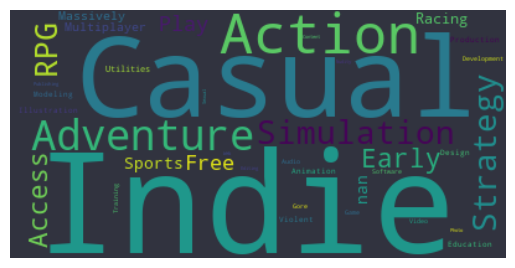

In [29]:
#Aqui tambien una mirada general a la plataforma, como conclusión nos permite ver que es una ventana importante a juegos independientes y casuales.

df_g6 = df['Genres'].str.split(',')

df_exploded = df_g6.explode()

df_exploded = df_exploded.astype(str)

lista_generos = df_exploded.tolist()

texto = ' '.join(lista_generos)

wc_g6 = WordCloud(
    background_color='#31333F',
    stopwords=STOPWORDS,
    collocations=False
)

wc_g6.generate(texto)

plt.imshow(wc_g6, interpolation='bilinear')
plt.axis('off')
plt.show()


g6 = go.Figure(data=[go.Image(z=wc_g6.to_array(),  hoverinfo="name")])
g6.update_layout(title_text="Géneros en videojuegos",
                 title_x=0.5,  # Ajusta la posición horizontal del título (0.5 es el centro)
                 title_y=0.95)

7. **Mapa**

C:\Users\memun\AppData\Local\Temp\ipykernel_18992\2772057326.py:15: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

C:\Users\memun\AppData\Local\Programs\Python\Python311\Lib\site-packages\mapclassify\classifiers.py:1592: UserWarning:

Not enough unique values in array to form 10 classes. Setting k to 7.



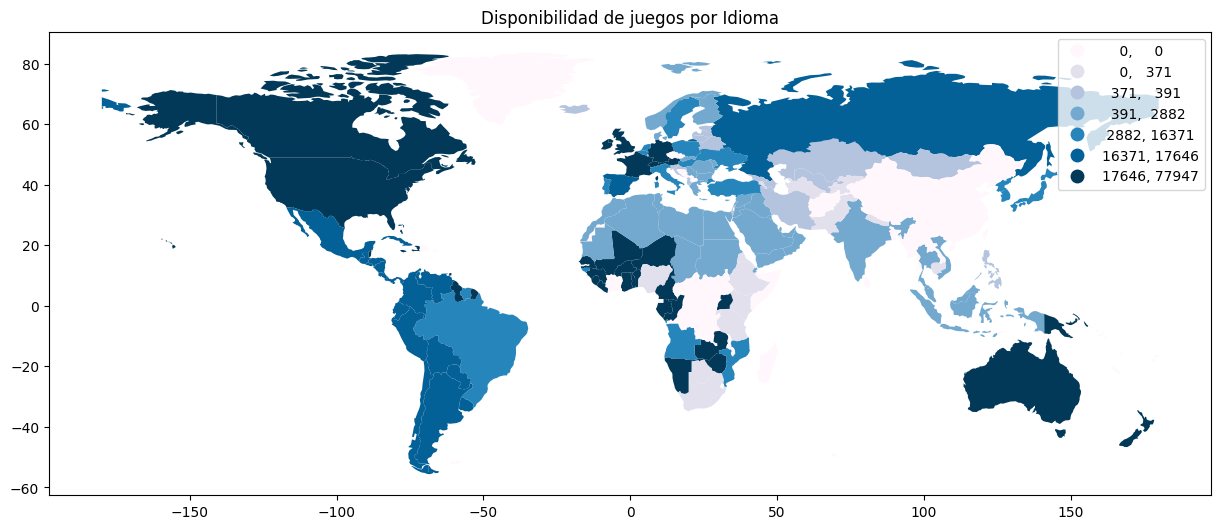

In [30]:
languages_per_country = languages.groupby('Language')['Country'].apply(list).reset_index()

games_languages_count = pd.DataFrame(columns=['Language', 'Country', 'Game count'])

for idx, row in languages_per_country.iterrows():
    language = row['Language']
    countries = row['Country']

    for country in countries:
        games_with_language = df[df['Supported languages'].apply(lambda x: language in x)]
        game_count = games_with_language.shape[0]

        games_languages_count = pd.concat([games_languages_count, pd.DataFrame({'Language': [language], 'Country': [country], 'Game count': [game_count]})], ignore_index=True)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est > 0) & (world.name != "Antarctica")]

world = world.merge(games_languages_count, how='left', left_on='name', right_on='Country')

world = world.fillna(0)

bins = mapclassify.Quantiles(world['Game count'], k=10).bins

g7, ax = plt.subplots(1, 1, figsize=(15, 10))

world.plot(column='Game count', ax=ax, cmap='PuBu', scheme="User_Defined",
         legend=True, classification_kwds=dict(bins=bins), legend_kwds={"fmt":"{:.0f}"})
plt.title('Disponibilidad de juegos por Idioma')
plt.show()

## Dashboard

In [31]:
#Aqui desplegamos el dashboard. Utilizamos un temas enfocado en los jugadores de videjuegos, algo oscuro y no tan exaltante a la vista.

# Estableciendo los colores para los gráficos como en la imagen proporcionada

#La distribución de los gráficos la diseñamos de esta manera: los dos primera que le muestren a la audiencia si de verdad es util Steam para el equipo en donde lo quieren utilizar; en los siguientes tres, una visión
#de los videojuegos mas populares en cuanto a cantidad de jugadores, precio, año de lanzamiento, etc; para luego finalizar con una vista global de las caracteristicas de los juegos en la plataforma, como
#lo es la distribución de calificaciones y los géneros de estos.

colors = {
    'background': '#31333F',
    'text': '#7FDBFF'
}

# Update layout graficos creados para adpatarlos a la paleta de colores y el background.
g1.update_layout(paper_bgcolor=colors['background'], plot_bgcolor=colors['background'], font_color='white')

g2.update_layout(paper_bgcolor=colors['background'], plot_bgcolor=colors['background'], font_color='white')

g5.update_layout(paper_bgcolor=colors['background'], plot_bgcolor=colors['background'], font_color='white')

g6.update_layout(paper_bgcolor=colors['background'], plot_bgcolor=colors['background'], font_color='white')
g6.update_xaxes(showticklabels=False)
g6.update_yaxes(showticklabels=False)

g8.update_layout(paper_bgcolor=colors['background'], plot_bgcolor=colors['background'], font_color='white')

app.layout = dbc.Container(
    fluid=True,
    style={'backgroundColor': colors['background']},
    children=[
        html.H1(
            'Dashboard Videojuegos Steam',
            style={'textAlign': 'center', 'color': 'white', 'marginTop': 25, 'marginBottom': 25}
        ),
        html.P(
            '''
            
El dashboard que hemos desarrollado es una herramienta analítica diseñada para ofrecer una amplia gama de métricas clave destinadas a comprender las tendencias y comportamientos dentro de la plataforma de Steam.''',
            style={'color': 'white', 'padding': '0 20px 20px 20px'}
        ),
        html.P(
            '''
                Nos enfocamos en crear una herramienta especialmente útil para los jugadores nuevos que están explorando opciones entre las diversas plataformas de videojuegos disponibles en el mercado. El objetivo principal de este dashboard es proporcionar una visión clara de la evolución de la disponibilidad de juegos y su compatibilidad con diversos sistemas operativos. Además, ofrece un análisis más profundo sobre los juegos más populares, examinando tanto períodos de tiempo actuales como anteriores. También proporciona una visión general de diversas características globales, como géneros y calificaciones, presentes en la plataforma.''',
            style={'color': 'white', 'padding': '0 20px 20px 20px'}
        ),
        html.P(
            '''Este enfoque integral permite a los usuarios tomar decisiones más informadas al elegir la plataforma de juegos que mejor se adapte a sus preferencias y necesidades.''',
            style={'color': 'white', 'padding': '0 20px 20px 20px'}
        ),
        dbc.Row([
            dbc.Col(
                dbc.Card(
                    dbc.CardBody([
                        html.H5("Top Juegos Recomendados", className="card-title", style={'color': 'white'}),
                        html.I(className="fas fa-laptop-code", style={'fontSize': 24, 'color': 'white'}),
                        html.P(id="random-developer", className="card-text", style={'color': 'white', 'marginTop': 10}),
                    ]),
                    style={'backgroundColor': '#17A2B8', 'border': 'none', 'borderRadius': '10px'},
                    className="mb-3"
                ),
                width=6
            ),
            dbc.Col(
                dbc.Card(
                    dbc.CardBody([
                        html.H5("Top promedio de minutos jugados por jugador", className="card-title", style={'color': 'white'}),
                        html.I(className="fas fa-clock", style={'fontSize': 24, 'color': 'white'}),
                        html.P(id="yearly-sales-info", className="card-text", style={'color': 'white', 'marginTop': 10}),
                    ]),
                    style={'backgroundColor': '#FFC107', 'border': 'none', 'borderRadius': '10px'},
                    className="mb-3"
                ),
                width=6
            ),
        ]),
        dcc.Interval(
            id='interval-component',
            interval=3*1000,
            n_intervals=0
        ),
        dcc.Store(id='year-index', data=0),
        dbc.Row([
            dbc.Col(
                dcc.Graph(
                    id='bar-chart',
                    figure=g1,
                    config={'displayModeBar': False},
                ),
                width=6
            ),
            dbc.Col(
                dcc.Graph(
                    id='line-chart',
                    figure=g2,
                    config={'displayModeBar': False},
                ),
                width=6
            ),
        ]),
        dbc.Row([
            dbc.Col(dcc.Graph(id='top_games',figure=g8, config={'displayModeBar': False}), width=6),
            dbc.Col(
                dbc.Container([
                    dcc.Dropdown(
                        id='game-dropdown',
                        options=[
                            {'label': name, 'value': appid}
                            for name, appid in zip(top_games['Name'], top_games['AppID'])
                        ],
                        value=top_games['AppID'].iloc[0]
                    ),
                    dcc.Graph(id='pie-chart')
                ]),
                width=6
            )
   
        ]),
        dbc.Row([
    dbc.Col(dcc.Graph(id='heatmap', figure=g5, config={'displayModeBar': False}), width=12),
], style={'margin-bottom': '100px'}),  # Ajusta el margen inferior para agregar espacio

       dbc.Row([
            dbc.Col(dcc.Graph(id='word_cloud',figure=g6, config={'displayModeBar': False}), width=6),
            dbc.Col(
                dbc.Container([
                    dcc.RangeSlider(
                        id='year-slider',
                        min=min_year,
                        max=max_year,
                        value=[min_year, max_year],
                        marks={str(year): str(year) for year in range(min_year, max_year+1, 5)},
                        step=1
                    ),
                    dcc.Graph(id='metacritic-score-histogram')
                ]),
                width=6
            )
        ])
    ]
)

if __name__ == '__main__':
    app.run_server(debug=True, use_reloader=False, port=8089)
